<a href="https://colab.research.google.com/github/SuanandaYogi/Python_Tutorial/blob/master/Sesi%201%20-%20Pengenalan%20Python%20untuk%20Ilmu%20Geofisika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mencari Solusi Persamaan Linear Sederhana

Misalkan sebuah kasus persamaan linear 1 variabel sederhana dengan bentuk $y=mx+c$ memiliki dua data yaitu **(1,-0.5)** dan **(3,2.5)**.
![fig1](https://raw.githubusercontent.com/SuanandaYogi/Python_Tutorial/master/images/fig1.png)

Kita diminta untuk mencari persamaan yang bisa menghubungkan kedua titik tersebut. Dengan menggunakan persamaan linear kita dapat merumuskan kedua titik sebagai berikut : 

$$-0.5 = 1a+b$$
$$2.5 = 3a+b$$

dengan persamaan ini kita dapat melakukan subtitusi sehingga didapat nilai $m=1.5$ dan $c=-2$. Cara lain yang kita gunakan adalah menggunakan perhitungan matriks. Kita bisa definisikan dua persamaan di atas menjadi bentuk matriks berikut:

$$\begin{bmatrix} 1 & 1 \\ 3 & 1 \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} -0.5 \\ 2.5 \end{bmatrix}$$

Jika kita definisikan matriks $\mathbf{G} = \begin{bmatrix} 1 & 1 \\ 3 & 1 \end{bmatrix}$ sebagai matriks Kernel, $\mathbf{m}=\begin{bmatrix} a \\ b \end{bmatrix}$ sebagai model yang dicari, dan $\mathbf{d}=\begin{bmatrix} -0.5 \\ 2.5 \end{bmatrix}$ sebagai data yang kita ketahui. 

Kita dapat menuliskan persamaan di atas menjadi

$$\mathbf{G}\mathbf{m}=\mathbf{d}$$.

Untuk mencari nilai $\mathbf{m}$ kita dapat lakukan operasi inversi sebagai berikut

$$\mathbf{m}=\mathbf{G}^{-1}\mathbf{d}$$

dengan $\mathbf{G}^{-1}$ adalah _inverse_ matriks dari $\mathbf{G}$

Kita coba terapkan perhitungan matrisk ini dengan **Python**

## Memanggil modul Numpy
Sebelum memulai perhitungan numerik, kita panggil modul perhitungan numerik yang ada di Python, yaitu Numpy. Modul Numpy dipanggil dan selanjutnya disebut sebagai **np**

In [1]:
import numpy as np 

kita definisikan terlebih dahulu matriks $\mathbf{G}$ dan matriks $\mathbf{d}$ dengan memanggil fungsi `array`. Di awal kita berikan keterangan dengan menambahkan komentar menggunakan `#`.

In [2]:
#mendefinisikan matriks G dan d untuk proses inversi

G = np.array([[1, 1],[3, 1]])
d = np.array([[-0.5],[2.5]])

Untuk memastikan hasil kita benar, kita dapat tampilkan hasilnya dengan mengetik fungsi `print`.

In [3]:
print(G)
print(d)

[[1 1]
 [3 1]]
[[-0.5]
 [ 2.5]]


Kita lanjutkan dengan melakukan proses inversi dengan menggunakan fungsi `inv` dari `linalg` dan perkalian _dot_ matriks

In [4]:
#menghitung matriks m

m = np.dot(np.linalg.inv(G),d)

#memastikan dimensi dari m

print('dimensi dari m', m.shape)

#print hasil m

print('hasil perhitungan a =', m[0,0], 'b =', m[1,0])

dimensi dari m (2, 1)
hasil perhitungan a = 1.5 b = -1.9999999999999996


Hasil tersebut adalah matriks $\mathbf{m}$ yang mengandung $\begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} 1.5 \\ -2 \end{bmatrix}$. Kita juga dapat menampilkan bentuk/dimensi dari matriks $\mathbf{m}$ dengan menggunakan perintah `m.shape`. Dimensi dari matriks $\mathbf{m}$ adalah (2,1) atau memiliki 2 baris dan 1 kolom, sesuai dengan perhitungan awal kita. Sementara itu, untuk memanggil nilai $a$ kita perlu memanggil komponen 0,0 (baris,kolom) dari $\mathbf{m}$, sedangkan nilai $b$ kita perlu memanggil komponen 1,0 (baris,kolom) dari $\mathbf{m}$.

## Menampilkan Kurva 
### Memanggil modul Matplotlib
Untuk menampilkan kurva hasil perhitungan kita gunakan modul Matplotlib, khususnya bagian yang lebih spesifik yaitu **pyplot**. Hal ini dilakukan dengan cara mengimport pyplot dan kemudian menyebutnya sebagai **plt** agar lebih singkat.

In [5]:
import matplotlib.pyplot as plt

jika sebelumnya kita sudah membuat matriks, kita bisa membuat array 1 dimensi untuk menampilkan kurva sesuai dengan batas awal, batas akhir, dan jumlah data yang diinginkan menggunakan fungsi `linspace`.

In [6]:
#membuat array x untuk plot kurva pada sumbu xy

x = np.linspace(-10,10,num=50) #np.linspace(start,finish,number of samples)

#menghitung y dengan menggunakan array x dan variabel dari matrikx m (a,b)

y = m[0]*x+m[1]

In [7]:
print(x) #menampilkan variabel x
print(y) #menampilkan variabl y
print('dimensi array y', y.shape) #menampilkan dimensi dari y

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]
[-17.         -16.3877551  -15.7755102  -15.16326531 -14.55102041
 -13.93877551 -13.32653061 -12.71428571 -12.10204082 -11.48979592
 -10.87755102 -10.26530612  -9.65306122  -9.04081633  -8.42857143
  -7.81632653  -7.20408163  -6.59183673  -5.97959184  -5.36734694
  -4.75510204  -4.14285714  -3.53061224  -2.91836735  -2.30612245
  -1.6938

Selanjutnya kita plot array x dan array y dalam bentuk kurva dengan cara paling sederhana menggunakan perintah-perintah berikut

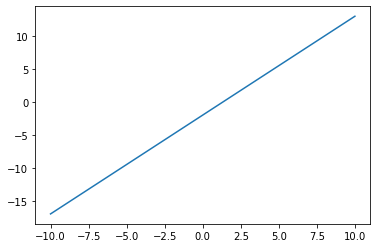

In [8]:
plt.figure() #membuat gambar yang siap diisi dengan kurva atau peta
plt.plot(x,y) #plot array x dan y
plt.show() #menampilkan gambar

Misalkan anda ingin memastikan bahwa garis tersebut sudah sesuai dengan data yang kita miliki sebelumnya, yaitu **(1,-0.5)** dan **(3,2.5)**. Kita dapat menambahkan plot titik pada gambar di atas.

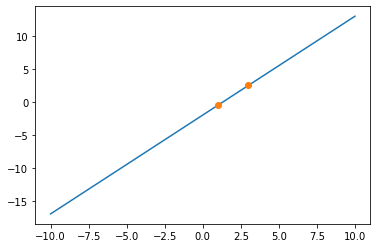

In [9]:
plt.figure() #membuat gambar yang siap diisi dengan kurva atau peta
plt.plot(x,y) #plot array x dan y

#tambahan data
#menambahkan titik data yang dimiliki secara manual. 
#[1,3] adalah komponen sumbu x dari data
#[-0.5,2.5] adalah komponen sumbu y dari data
#'o' adalah bentuk tanda (marker) yang digunakan contoh lain adalah ('.','s','^','*',dll)
plt.plot([1,3],[-0.5,2.5],'o') 

plt.show() #menampilkan gambar

Gambar di atas dapat kita perlengkap dengan menambahkan fitur-fitur seperti, label pada sumbu x dan y, grid, dan judul dengan tambahan perintah berikut.

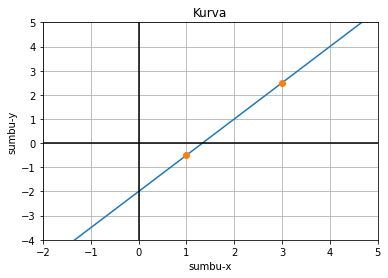

In [10]:
plt.figure() #membuat gambar yang siap diisi dengan kurva atau peta
plt.plot(x,y) #plot array x dan y

#tambahan data
#menambahkan titik data yang dimiliki secara manual. 
#[1,3] adalah komponen sumbu x dari data
#[-0.5,2.5] adalah komponen sumbu y dari data
#'o' adalah bentuk tanda (marker) yang digunakan contoh lain adalah ('.','s','^','*',dll)
plt.plot([1,3],[-0.5,2.5],'o') 

#tambahan perintah
plt.xlabel('sumbu-x') #menambah label pada sumbu x
plt.ylabel('sumbu-y') #menambah label pada sumbu y
plt.title('Kurva') #menambah judul pada gambar
plt.xlim(-2,5) #memberi batasan rentang yang ditampilkan pada sumbu x
plt.ylim(-4,5) #memberi batasan rentang yang ditampilkan pada sumbu y
plt.grid() #menambah grid pada gambar

#optional
plt.axhline(linewidth=1.5, color='k') #menambahkan sumbu x pada y = 0
plt.axvline(linewidth=1.5, color='k') #menambahkan sumbu y pada x = 0


plt.show() #menampilkan gambar

# Solusi persamaan linear untuk data yang lebih banyak

Berikut ini adalah data yang kita miliki dari data temperatur dan kedalaman. Tentukan berapa gradien temperatur (_thermal gradient_) dari data lubang bor area _Carson Sinks, Nevada_ ini.

|Kedalaman (m)|Temperatur(<sup>o</sup>C)|
|---------|----------|
|98.1|18.8|
|195.7|25.8|
|267.2|31.3|
|355.6|39.2|
|495.5|51.2|
|624.2|62.3|
|792.1|75.7|
|953.2|87.9|
|1115.1|99.3|
|1300.2|110.2|

Awali dengan mendefinisikan rumus umum, yaitu 

$$depth\times a+b = Temperature$$

setelah itu kita definisikan matriks yang digunakan untuk mendeskripsikan persamaan linear dari data dan rumus di atas, yaitu

$$\begin{bmatrix} depth_{1} & 1 \\ depth_{2} & 1 \\ . & 1 \\ . & 1 \\ depth_{N} & 1 \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} Temperature_{1} \\ Temperature_{2} \\ . \\ . \\ Temperature_{N}\end{bmatrix}$$

dengan jumlah $N$ adalah 10.
Atau dapat ditulis dengan $\mathbf{G}\mathbf{m}=\mathbf{d}$. Sebelumnya cara menyelesaikan persamaan ini dapat dilakukan dengan melakukan perkalian inverse matriks $\mathbf{G}$ dengan $\mathbf{d}$, namun pada kasus ini matriks tidak berbentuk persegi atau dimensi baris dan kolom tidak sama. Untuk menyelesaikan permasalahan ini kita gunakan penyelesaian inversi dengan rumus

$$\mathbf{m}=(\mathbf{G}^{T}\mathbf{G})^{-1}\mathbf{G}^{T}\mathbf{d}$$

dengan $\mathbf{G}^{T}$ adalah transposisi dari matriks $\mathbf{G}$

## Perhitungan Numerik

Setelah memahami apa yang harus kita lakukan, kita mulai masuk dalam perhitungan secara numerik dengan diawali dengan mendefinisikan data Temperatur dan kedalaman

In [11]:
#kita import modul perhitungan numerik (Numpy) dan ploting (Matplotlib.pyplot) secara bersamaan

import numpy as np
import matplotlib.pyplot as plt

Temperature = np.array([18.83, 25.83, 31.31, 39.23, 51.22, 62.34, 75.67, 87.87, 99.32, 110.17]) #dalam Celcius
depth = np.array([98.1, 195.7, 267.2, 355.6, 495.5, 624.2, 792.1, 953.2, 1115.1, 1300.2]) #dalam meter

Sebelum kita hitung nilai gradien dari temperatur, kita plot data-data yang ada agar kita mendapat gambaran umum data yang dimiliki

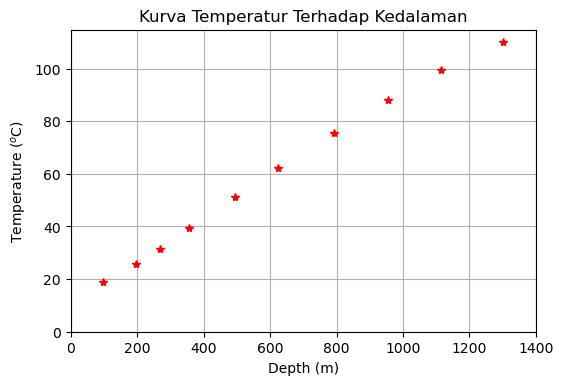

In [12]:
plt.figure(dpi=100) #dpi besar memberbesar dan meningkatkan kualitas gambar (normal 95)
plt.plot(depth,Temperature,'r*') #plot dengan tanda bintang

#tambahan perintah
plt.xlabel('Depth (m)') #menambah label pada sumbu x
plt.ylabel('Temperature ($^{o}$C)') #menambah label pada sumbu y
plt.title('Kurva Temperatur Terhadap Kedalaman') #menambah judul pada gambar
plt.xlim(0,1400) #memberi batasan rentang yang ditampilkan pada sumbu x dari 0 m hingga 1400 m
plt.ylim(0,) #memberi batasan rentang yang ditampilkan pada sumbu y dari 0 C hingga maksimum
plt.grid() #menambah grid pada gambar

plt.show()

Selanjutnya membuat matriks $\mathbf{G}$ dan matriks $\mathbf{d}$

In [13]:
#mendefinisikan matriks G
G = np.array([[98.1, 1], [195.7, 1], [267.2, 1], [355.6, 1], [495.5, 1], \
              [624.2, 1], [792.1, 1], [953.2, 1], [1115.1, 1], [1300.2, 1]]) #tanda \ melanjutkan perintah ke baris berikutnay
print('matriks G')
print(G)

#untuk menghemat waktu, data temperatur yang tidak memiliki dimensi (array) 
#bisa kita ubah menjadi matriks d dengan dimensi Nx1 menggunakan

d = np.reshape(Temperature,(-1,1)) 

#tanda -1 di sini mengindikasikan jumlah 
#maksimal dari data depth tanpa perlu menuliskannya secara eksplisit sehingga didapat bentuk Nx1

print('matriks d')
print(d)

#proses inversi

#operasi untuk menyederhanakan perhitungan kita pisah-pisah perhitungan dan digabung di akhir
GT = G.T #proses transposisi matriks G
GTG = np.dot(GT,G) 
GTd = np.dot(GT,d)

#perhitungan final

m = np.dot(np.linalg.inv(GTG),GTd)

print('matriks m')
print(m)
print('Gradien dari Temperatur adalah ', m[0,0], 'C/m atau', m[0,0]*1000, 'C/km')

matriks G
[[9.8100e+01 1.0000e+00]
 [1.9570e+02 1.0000e+00]
 [2.6720e+02 1.0000e+00]
 [3.5560e+02 1.0000e+00]
 [4.9550e+02 1.0000e+00]
 [6.2420e+02 1.0000e+00]
 [7.9210e+02 1.0000e+00]
 [9.5320e+02 1.0000e+00]
 [1.1151e+03 1.0000e+00]
 [1.3002e+03 1.0000e+00]]
matriks d
[[ 18.83]
 [ 25.83]
 [ 31.31]
 [ 39.23]
 [ 51.22]
 [ 62.34]
 [ 75.67]
 [ 87.87]
 [ 99.32]
 [110.17]]
matriks m
[[ 0.07829144]
 [11.6625785 ]]
Gradien dari Temperatur adalah  0.07829143846732764 C/m atau 78.29143846732764 C/km


Dari hasil perhitungan kita tahu bahwa gradien dari temperatur di lokasi tersebut adalah sekitar 78.3 <sup>o</sup>C/km. Persamaan umum dari masalah ini adalah

$$Temperature = 0.0783 \times depth + 11.66$$

Kita lanjutkan dengan menampilkan kurva hasil perhitungan dengan data yang dimiliki. Seperti sebelumnya kita definisikan rentang plot sebagai (`depth_plot`). Pada kasus ini kita definisikan dari 0 m hingga 1500 m dengan 100 data sampel.


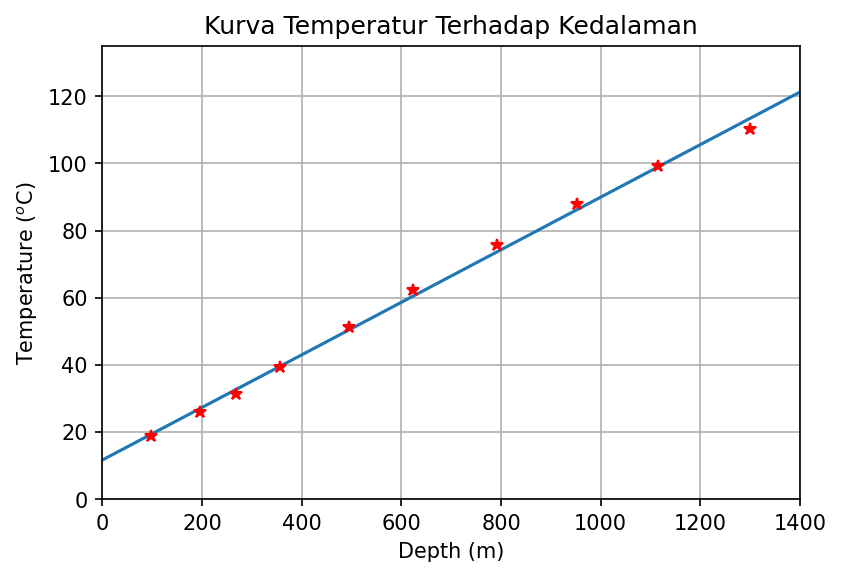

In [14]:
depth_plot = np.linspace(0,1500,num=100)
Temperature_plot = depth_plot*m[0,0]+m[1,0]

#plot kurva dan data pengukuran
plt.figure(dpi=150) #dpi besar memberbesar dan meningkatkan kualitas gambar (normal 95)
plt.plot(depth_plot,Temperature_plot)
plt.plot(depth,Temperature,'r*') #plot dengan tanda bintang

#tambahan perintah
plt.xlabel('Depth (m)') #menambah label pada sumbu x
plt.ylabel('Temperature ($^{o}$C)') #menambah label pada sumbu y
plt.title('Kurva Temperatur Terhadap Kedalaman') #menambah judul pada gambar
plt.xlim(0,1400) #memberi batasan rentang yang ditampilkan pada sumbu x dari 0 m hingga 1400 m
plt.ylim(0,) #memberi batasan rentang yang ditampilkan pada sumbu y dari 0 C hingga maksimum
plt.grid() #menambah grid pada gambar

plt.show()

# Menghitung error (RMS)

Kesalahan model yang dibuat dari inversi dibandingkan dengan data pengukuran (data Temperature) dapat kita lakukan dengan menggunakan persamaan _Root Mean Square_ (**RMS**) dengan rumus berikut ini.
$$RMS=\sqrt{\frac{1}{N}\sum \limits_{i=1}^{N}\Big(d^{cal}_{i}-d^{obs}_{i}\Big)^{2}}$$

dengan $d^{cal}_{i}$ adalah data Temperatur yang kita hitung dengan parameter hasil inversi, dan $d^{obs}_{i}$ adalah data Temperatur yang diukur dilapangan. Untuk menghitung $d^{cal}_{i}$ kita harus memasukkan nilai kedalaman yang diukur sehingga didapat nilai temperatur dari parameter hasil inversi. Sebagai contoh pada data kedalaman ke-1 98.1 m memiliki hasil pengukuran 18.8 <sup>o</sup>C
$$d^{1}_{cal} = 0.0783 \times depth_{1} + 11.66$$
$$d^{1}_{cal} = 0.0783 \times 98.1 + 11.66$$

In [15]:
d_cal = 0.0783*98.1+11.66
print('hasil perhitungan', d_cal, 'C')

hasil perhitungan 19.34123 C


Kita bandingkan hasil ini kemudian kuadratkan. Proses ini dilakukan untuk semua kedalaman hingga kedalaman ke-10. Untuk itu akan dijelaskan dua konsep pemrograman yaitu **fungsi** atau `function` dan **iterasi**. Pertama-tama kita bahas tentang `function`. Fungsi memiliki tujuan membuat penulisan program lebih rapi agar tidak melakukan sebuah rutinitas yang sama berulang-ulang. Fungsi secara matematis dapat diartikan sebuah proses yang merubah input menjadi output. Dan hal ini juga berlaku pada bahasa pemrograman. Berikut ini adalah fungsi yang telah kita dapatkan, yaitu fungsi yang menghitung _Temperature_ dengan input _depth_. 

$$Temperature(depth) = 0.0783 \times depth + 11.66$$

perhitungan seperti ini dapat dilakukan dengan : 

`d_cal = 0.0783*98.1+11.66` 

`d_cal = 0.0783*195.7+11.66` 

`d_cal = 0.0783*267.2+11.66` dan seterusnya

Porses ini dapat dibuat lebih sederhana dan elegan dengan kita definisikan terlebih dahulu fungsi yang kita sebut sebagai `Fungsi_Temp` dengan perintah `def`

In [16]:
def Fungsi_Temp(depth_input): #harus diawali dengan def dan diakhir dengan : (titik dua)
    #perhitungan di bawah baris awal harus diberi jarak 1 tab untuk 
    #mendefinisikan bahawa perhitungan atau perintah masih dibawah hirarki yang sama
    d_cal = 0.0783*depth_input+11.66 
    return d_cal

Variabel depth_input dalam fungsi `Fungsi_Temp(depth)` adalah input yang diperlukan fungsi untuk menghitung `d_cal`. Baris ketiga `return d_cal` memrintahkan fungsi kita untuk mengeluarkan nilai `d_cal`. Kita coba dengan memraktikkan fungsi ini.

In [17]:
#menjalankan Fungsi_Temp dengan input sesuai yang kita inginkan
Fungsi_Temp(250)

31.235

In [18]:
#atau merekam hasil perhitungan fungsi ke dalam sebuah variabel
hasil = Fungsi_Temp(1000) #menghitung fungsi Fungsi_Temp dengan input 1000m dan direkam sebagai variabel hasil
print(hasil)

89.96


Dari contoh di atas dapat terlihat bahwa proses perhitungan dapat ditulis dengan lebih singkat sehingga kode yang anda buat menjadi lebih rapi. Selanjutnya kita pelajari proses iterasi pada Python. Iterasi memiliki arti perulangan. Kita akan mencoba membuat sebuah iterasi dengan `for` secara sederhana. Sebagai berikut

In [19]:
for i in range(5): #mendefinisikan sebuah iterasi diawali dengan for, kemudian iterator, rentang iterasi, dan diakhiri : (titik dua)
    #perhitungan di bawah baris awal harus diberi jarak 1 tab untuk 
    #mendefinisikan bahawa perhitungan atau perintah masih dibawah hirarki yang sama
    print(i) #mencetak nilai i yang berperan sebagai iterator sesuai dengan banyaknya rentang iterasi (range(5))

0
1
2
3
4


rentang iterasi pada contoh di atas haruslah integer/bilangan bulat. Fungsi `range(5)` bertujuan untuk membuat array berjumlah 5 angka diawali dengan angka 0 hingga angka 4 (5 angka). Mari kita coba menggunakan rentang iterasi sesuai dengan variabel `K`.

In [20]:
K = 5 #mendefinisikan variabel K, anda bisa ganti sesuai keinginan anda
for it in range(K): #mengganti iterator dengan nama lain (it)
    print('it ke-', it) #mencetak iterator yang bernama it
    hasil = it*2 #iterator dapat dimasukkan kedalam perhitungan sehingga hasil yang didapat mengikuti iterasi 
    print('hasil =', hasil) #mencetak hasil perhitungan tiap iterasi
    print('---') #kita pisahkan hasil tiap iterasi agar lebih jelas

it ke- 0
hasil = 0
---
it ke- 1
hasil = 2
---
it ke- 2
hasil = 4
---
it ke- 3
hasil = 6
---
it ke- 4
hasil = 8
---


Kita juga dapat memanggil isi dari matriks atau array menggunakan iterasi seperti contoh berikut

In [21]:
for it in range(3):
    d_obs = Temperature[it] #apa yang terjadi?
    print(d_obs)

18.83
25.83
31.31


## Mendefinisikan d_obs dan d_cal

In [22]:
#menyiapkan ruang kosong untuk diisi oleh perhitungan Fungsi_Temp

N = Temperature.size #menghitung banyaknya jumlah data Temperature dan menyimpan ke dalam variabel N
d_cal = np.zeros(N) #menyiapkan array dengan nilai 0 sebanyak N elemen
print('d_cal pertama yang masing kosong')
print(d_cal)

for it in range(N):
    d_cal[it] = Fungsi_Temp(depth[it])
    print('pengisian ke-',it)
    print(d_cal)
print('d_cal akhir ',d_cal) 

d_obs = np.copy(Temperature) #proses menyalin Temperature sebagai d_obs 

d_cal pertama yang masing kosong
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pengisian ke- 0
[19.34123  0.       0.       0.       0.       0.       0.       0.
  0.       0.     ]
pengisian ke- 1
[19.34123 26.98331  0.       0.       0.       0.       0.       0.
  0.       0.     ]
pengisian ke- 2
[19.34123 26.98331 32.58176  0.       0.       0.       0.       0.
  0.       0.     ]
pengisian ke- 3
[19.34123 26.98331 32.58176 39.50348  0.       0.       0.       0.
  0.       0.     ]
pengisian ke- 4
[19.34123 26.98331 32.58176 39.50348 50.45765  0.       0.       0.
  0.       0.     ]
pengisian ke- 5
[19.34123 26.98331 32.58176 39.50348 50.45765 60.53486  0.       0.
  0.       0.     ]
pengisian ke- 6
[19.34123 26.98331 32.58176 39.50348 50.45765 60.53486 73.68143  0.
  0.       0.     ]
pengisian ke- 7
[19.34123 26.98331 32.58176 39.50348 50.45765 60.53486 73.68143 86.29556
  0.       0.     ]
pengisian ke- 8
[19.34123 26.98331 32.58176 39.50348 50.45765 60.53486 73.68143 86.29556
 98.97233

Menghitung rata-rata dari beberapa data. Kita coba menghitung rata-rata temperatur dari N data (jumlah data temperatur). Dapat terlihat bahwa variable `jumlah` yang didefinisikan di awal sebagai 0 nilainya ditambah tiap iterasi dengan nilai temperatur ke-i, sehingga semakin lama semakin besar. Kemudian nilai `jumlah` ini akan dibagi dengan banyaknya iterasi dan didapat rata-rata.

In [23]:
jumlah = 0
N = Temperature.size #menghitung banyaknya jumlah data Temperature dan menyimpan ke dalam variabel N
for it in range(N):
    jumlah = jumlah + Temperature[it] #apa yang terjadi?
    print('jumlah dari iterasi ke-', it, 'adalah', jumlah)
rata2 = jumlah/K
print('rata-rata temperatur adalah', rata2)

jumlah dari iterasi ke- 0 adalah 18.83
jumlah dari iterasi ke- 1 adalah 44.66
jumlah dari iterasi ke- 2 adalah 75.97
jumlah dari iterasi ke- 3 adalah 115.19999999999999
jumlah dari iterasi ke- 4 adalah 166.42
jumlah dari iterasi ke- 5 adalah 228.76
jumlah dari iterasi ke- 6 adalah 304.43
jumlah dari iterasi ke- 7 adalah 392.3
jumlah dari iterasi ke- 8 adalah 491.62
jumlah dari iterasi ke- 9 adalah 601.79
rata-rata temperatur adalah 120.35799999999999


## Pengembangan iterasi dan fungsi

Kita gabungkan konsep iterasi dan fungsi yang telah kita pelajari dengan menghitung **RMS**. Agar lebih mudah mengetahui jika ada kesalahan dalam menghitung **RMS**, kita buat perhitungan yang terpisah-pisah. 
$$RMS=\sqrt{\frac{1}{N}\sum \limits_{i=1}^{N}\Big(d^{cal}_{i}-d^{obs}_{i}\Big)^{2}}$$
Persamaan ini kita pecah menjadi perhitungan-perhitungan yang lebih sederhana menjadi
$$\textrm{kuadratdd}_{i} = \Big(d^{cal}_{i}-d^{obs}_{i}\Big)^{2}$$
variable $\textrm{kuadratdd}$ ini kita iterasi sebanyak $N$ kali, sehingga diapat variabel $\textrm{jumlah}$. 
$$\textrm{jumlah} = \sum \limits_{i=1}^{N} \textrm{kuadratdd}_{i}$$
Jumlah total ini kemudian dibagi dengan $N$, sehingga didapat nilai rata-rata 
$$\textrm{rata2} =\frac{\textrm{jumlah}}{N}$$
Nilai $\textrm{rata2}$ ini selanjutnya diakarkan dan didapat nilai **RMS**.
$$RMS = \sqrt{rata2}$$

In [24]:
jumlah = 0
N = d_obs.size
for it in range(N):
    kuadratdd = (d_cal[it]-d_obs[it])**2 #melakukan perhitungan d_cal dan d_obs ke-i
    jumlah = jumlah + kuadratdd

rata2 = jumlah/N
RMS = np.sqrt(rata2)
print('RMS =',RMS)

RMS = 1.5664888777805


### Membuat Fungsi RMS

Setelah kita yakin bahwa metode menghitung RMS kita tepat, kita dapat menyederhanakan runtutan perhitungan ini dengan menyederhanakannya menjadi sebuah fungsi tersendiri. FUngsi RMS akan kita buat umum sehingga dapat digunakan untuk menghitung segala data (d\_cal dan d\_obs). Fungsi ini akan bernama `Fungsi_RMS` dengan input variable `d_cal` dan `d_obs`.

Proses yang dilakukan sangat mudah, yaitu dengan menyalin langkah yang sudah benar di atas ke dalam fungsi `def Fungsi_RMS(d_cal,d_obs)`

In [25]:
def Fungsi_RMS(d_cal,d_obs):
    jumlah = 0
    N = Temperature.size
    for it in range(N):
        kuadratdd = (d_cal[it]-d_obs[it])**2 #melakukan perhitungan d_cal dan d_obs ke-i
        jumlah = jumlah + kuadratdd

    rata2 = jumlah/N
    RMS = np.sqrt(rata2)
    return RMS

### Implementasi fungsi RMS

In [26]:
print('data terukur', d_obs)
print('data terhitung', d_cal)
print('RMS', Fungsi_RMS(d_cal,d_obs)) 
#cara yang sangat elegan dalam menghitung RMS, fungsi ini dapat digunakan untuk berbagai kasus lain

data terukur [ 18.83  25.83  31.31  39.23  51.22  62.34  75.67  87.87  99.32 110.17]
data terhitung [ 19.34123  26.98331  32.58176  39.50348  50.45765  60.53486  73.68143
  86.29556  98.97233 113.46566]
RMS 1.5664888777805
